In [1]:
import pandas as pd

#### 1. Load tjh dataset into a pandas dataframe. Name the variable as "survey"

In [2]:
survey = pd.read_csv("./Technical-Interview.csv")

In [3]:
survey.head(3)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762


#### 2. How many samples were collected on each day?

In [4]:
len(survey['collection_date'].unique())

9

In [5]:
survey['collection_date'].nunique()

9

In [6]:
survey['collection_date'].value_counts().sort_values(ascending=False)

5-24-2017    1479
5-25-2017     998
5-28-2017     761
5-27-2017     665
5-29-2017     620
6-1-2017      607
5-26-2017     598
5-30-2017     582
5-31-2017     557
Name: collection_date, dtype: int64

#### 3. What proportion of the total respondents were aged less than 45? 

In [7]:
survey.head(3)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762


In [8]:
survey.dtypes

response_id           int64
collection_date      object
urban_rural          object
education            object
income               object
Vote_Now             object
Past_Vote            object
CM_satisfaction      object
MLA_satisfaction     object
age                  object
gender               object
assembly_no           int64
category             object
weight              float64
dtype: object

In [9]:
survey['age'].unique()

array(['26', '34', '25', '36', '22', '38', '23', '42', '51', '29', '24',
       '30', '39', '37', '19', '44', '53', '32', '21', '18', '20', '27',
       '48', '28', '45', '74', '35', '31', '70', '40', '49', '46', '43',
       '41', '33', '58', '24ko', '56', '50', '55', '54', '62', '60', '59',
       '47', '61', '52', '66', '57', '67', '65', '71', '63', '64', '68',
       '69', '99', '72', '75', '76'], dtype=object)

In [10]:
len(survey[survey['age'] == "24ko"])

1

In [11]:
survey['age'] = survey['age'].replace({"24ko" : 24})

In [12]:
survey.head(3)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762


In [13]:
survey['age'] = survey['age'].astype('int')

In [14]:
survey['age'].dtype

dtype('int32')

In [15]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   response_id       6867 non-null   int64  
 1   collection_date   6867 non-null   object 
 2   urban_rural       6867 non-null   object 
 3   education         6867 non-null   object 
 4   income            6867 non-null   object 
 5   Vote_Now          6867 non-null   object 
 6   Past_Vote         6867 non-null   object 
 7   CM_satisfaction   6867 non-null   object 
 8   MLA_satisfaction  6867 non-null   object 
 9   age               6867 non-null   int32  
 10  gender            6867 non-null   object 
 11  assembly_no       6867 non-null   int64  
 12  category          6867 non-null   object 
 13  weight            6867 non-null   float64
dtypes: float64(1), int32(1), int64(2), object(10)
memory usage: 724.4+ KB


In [16]:
len(survey[survey['age'] < 45]) * 100 / len(survey)

93.18479685452162

#### 4. create a new column in the dataframe "age_group". This column should contain the age the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+. 

In [17]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   response_id       6867 non-null   int64  
 1   collection_date   6867 non-null   object 
 2   urban_rural       6867 non-null   object 
 3   education         6867 non-null   object 
 4   income            6867 non-null   object 
 5   Vote_Now          6867 non-null   object 
 6   Past_Vote         6867 non-null   object 
 7   CM_satisfaction   6867 non-null   object 
 8   MLA_satisfaction  6867 non-null   object 
 9   age               6867 non-null   int32  
 10  gender            6867 non-null   object 
 11  assembly_no       6867 non-null   int64  
 12  category          6867 non-null   object 
 13  weight            6867 non-null   float64
dtypes: float64(1), int32(1), int64(2), object(10)
memory usage: 724.4+ KB


In [18]:
def age_group(x):
    if 18<=x<25:
        return "18-24"
    elif 25<=x<39:
        return "25-39"
    elif 40<=x<55:
        return "40-55"
    elif x>=55:
        return "55+"
survey['age_group'] = survey['age'].apply(age_group)

In [19]:
survey.head(5)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-39
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-39
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,25-39
3,4,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,25-39
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,18-24


#### 5. How many samples were collected for each age-group? which age-group had the most samples?

In [20]:
survey['age_group'].value_counts().sort_values(ascending=False)

25-39    3775
18-24    2094
40-55     801
55+       128
Name: age_group, dtype: int64

#### 6 What proportion of the respondents had opted for the RJD party in both the vote_now and Past_vote questions?

In [21]:
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-39
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-39
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,25-39
3,4,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,25-39
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,18-24


In [22]:
len(survey[(survey['Vote_Now'] == "RJD") & (survey["Past_Vote"] == "RJD")])

811

In [23]:
#proportion
len(survey[(survey['Vote_Now'] == "RJD") & (survey["Past_Vote"] == "RJD")]) * 100 / len(survey)

11.810106305519149

#### 7. For each day sample collection determine the proportion of repondenrs who were fully satisfied with the performance of the CM. So if there were a total of 1000 samples on day 1 and 300 out those said they were fully satisfied, then out answer for that day would be 0.3

In [24]:
survey.head(3)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-39
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-39
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,25-39


In [25]:
survey['CM_satisfaction'].unique()

array(['Fully Dissatisfied', 'Somewhat Satisfied', 'Fully Satisfied',
       'Somewhat Dissatisfied', 'Can’t say'], dtype=object)

In [26]:
survey[survey['CM_satisfaction'] == "Fully Satisfied"].collection_date.value_counts().sort_values(ascending=False)

5-24-2017    146
5-25-2017     95
5-28-2017     92
6-1-2017      75
5-29-2017     73
5-30-2017     65
5-31-2017     62
5-26-2017     59
5-27-2017     54
Name: collection_date, dtype: int64

In [27]:
survey[survey['CM_satisfaction'] == "Fully Satisfied"].collection_date.value_counts() * 100 / survey['collection_date'].value_counts()

5-24-2017     9.871535
5-25-2017     9.519038
5-26-2017     9.866221
5-27-2017     8.120301
5-28-2017    12.089356
5-29-2017    11.774194
5-30-2017    11.168385
5-31-2017    11.131059
6-1-2017     12.355848
Name: collection_date, dtype: float64

#### 8 . In similar fashion create a day-wise proportion of respondents that opted fully dissatisfied with their MLA. Create a line plot of the result with date on x-axis and proportions on the y-axis.

In [28]:
survey.head(3)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-39
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-39
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,25-39


In [29]:
a = survey[survey['MLA_satisfaction'] == "Fully Dissatisfied"].collection_date.value_counts()
a

5-24-2017    887
5-25-2017    630
5-28-2017    462
5-27-2017    403
6-1-2017     385
5-30-2017    361
5-26-2017    353
5-29-2017    350
5-31-2017    321
Name: collection_date, dtype: int64

In [30]:
b = survey['collection_date'].value_counts()
b

5-24-2017    1479
5-25-2017     998
5-28-2017     761
5-27-2017     665
5-29-2017     620
6-1-2017      607
5-26-2017     598
5-30-2017     582
5-31-2017     557
Name: collection_date, dtype: int64

In [31]:
proportion = a * 100 / b
proportion

5-24-2017    59.972955
5-25-2017    63.126253
5-26-2017    59.030100
5-27-2017    60.601504
5-28-2017    60.709593
5-29-2017    56.451613
5-30-2017    62.027491
5-31-2017    57.630162
6-1-2017     63.426689
Name: collection_date, dtype: float64

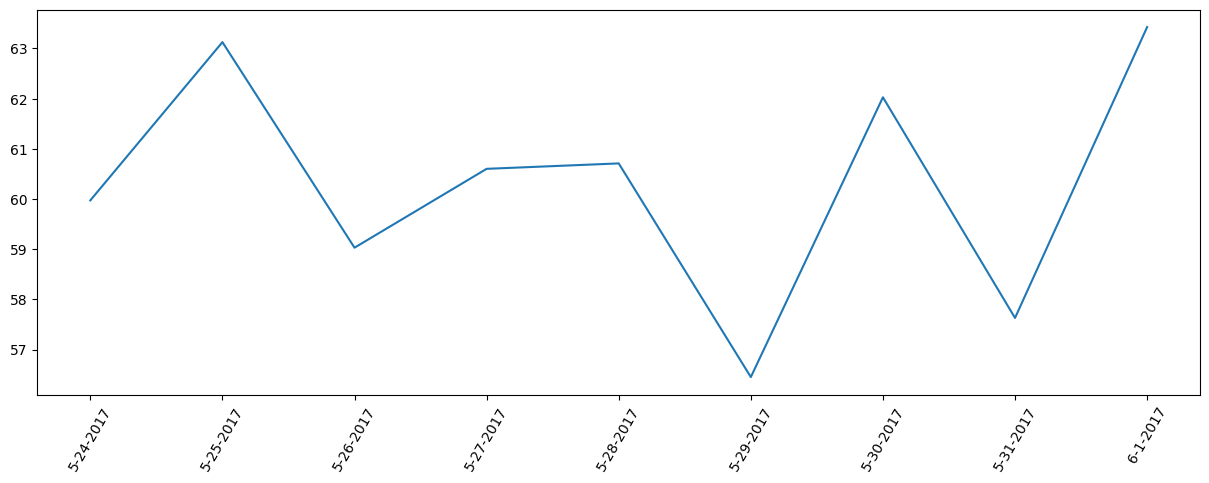

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(proportion)
plt.xticks(rotation = 60)
plt.show()

#### 9. Create a pivot-table (or crosstab) with index as Past_vote, column as vote_now and cell values as the count of samples

In [33]:
survey.head(3)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-39
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-39
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,25-39


In [34]:
survey.pivot_table(index='Past_Vote' , columns = "Vote_Now" , aggfunc = 'count')

CM_satisfaction                                              \
Vote_Now                 AAP AIMIM     BJP  BSP  HAM   INC JAP(L)  JD(U)   
Past_Vote                                                                  
BJP                      7.0   1.0  1630.0  3.0  5.0  42.0  101.0  110.0   
BSP                      NaN   1.0     2.0  5.0  NaN   1.0    NaN    NaN   
Did not vote             8.0   5.0   231.0  2.0  1.0  22.0   41.0   69.0   
HAM                      2.0   NaN    25.0  NaN  1.0   NaN    3.0    2.0   
INC                      NaN   6.0     6.0  NaN  NaN  57.0   10.0    9.0   
JAP(L)                   NaN   NaN     4.0  NaN  NaN   NaN   35.0    NaN   
JD(U)                    6.0  10.0   254.0  2.0  2.0  45.0   72.0  279.0   
LJP                      NaN   NaN    76.0  1.0  NaN   4.0    3.0    6.0   
Left Front               NaN   1.0     2.0  NaN  NaN   1.0    NaN    NaN   
NOTA                     NaN   1.0    29.0  1.0  NaN   9.0    7.0    7.0   
Others                   1.0   5.0    45.0  1.0  1.0   4.0    7.0    4.0   
RJD                      3.0   7.0    46.0  NaN  1.0  31.0   31.0   39.0   
RLSP                     NaN   NaN    17.0  NaN  NaN   NaN    3.0    NaN   
VIP                      NaN   NaN     NaN  NaN  NaN   NaN    NaN    1.0   

                               ... weight                                   \
Vote_Now       LJP Left Front  ...    LJP Left Front   NOTA Others Plurals   
Past_Vote                      ...                                           
BJP           44.0       13.0  ...   44.0       13.0  194.0   32.0    87.0   
BSP            NaN        NaN  ...    NaN        NaN    NaN    NaN     NaN   
Did not vote  10.0       16.0  ...   10.0       16.0   83.0   11.0    51.0   
HAM            2.0        NaN  ...    2.0        NaN    4.0    NaN     NaN   
INC            NaN        3.0  ...    NaN        3.0    6.0    3.0     3.0   
JAP(L)         NaN        NaN  ...    NaN        NaN    NaN    1.0     NaN   
JD(U)         29.0        9.0  ...   29.0        9.0   90.0   18.0    43.0   
LJP            9.0        2.0  ...    9.0        2.0    3.0    NaN     2.0   
Left Front     NaN       18.0  ...    NaN       18.0    1.0    1.0     NaN   
NOTA           3.0        5.0  ...    3.0        5.0   46.0    7.0    11.0   
Others         1.0        4.0  ...    1.0        4.0   10.0    6.0     8.0   
RJD            4.0        9.0  ...    4.0        9.0   18.0    8.0    10.0   
RLSP           NaN        NaN  ...    NaN        NaN    3.0    NaN     2.0   
VIP            NaN        NaN  ...    NaN        NaN    NaN    NaN     NaN   

                                                 
Vote_Now        RJD  RJJP  RLSP Undecided   VIP  
Past_Vote                                        
BJP           370.0  88.0  24.0      62.0  10.0  
BSP             NaN   NaN   NaN       NaN   NaN  
Did not vote  195.0  20.0   3.0      31.0   5.0  
HAM             6.0   4.0   NaN       1.0   NaN  
INC           100.0   1.0   2.0       7.0   NaN  
JAP(L)          2.0   NaN   NaN       NaN   NaN  
JD(U)         435.0  13.0  25.0      36.0   6.0  
LJP            17.0   1.0   NaN       1.0   NaN  
Left Front      4.0   NaN   1.0       NaN   1.0  
NOTA           27.0   5.0   4.0       5.0   NaN  
Others         21.0   7.0   1.0       6.0   NaN  
RJD           811.0   1.0  10.0      14.0   4.0  
RLSP            8.0   2.0  12.0       1.0   1.0  
VIP             NaN   NaN   NaN       NaN   1.0  

[14 rows x 234 columns]

#### 10. Repeat the above question with the cell values as the sum of "weight"

In [35]:
survey.pivot_table(index='Past_Vote' , columns = "Vote_Now" , values='weight' , aggfunc = 'sum')

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691
BSP,NaN,1.654731,5.174487,32.010277,NaN,2.298223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552
HAM,0.312607,NaN,25.348884,NaN,1.648856,NaN,0.712161,1.006719,2.496424,NaN,0.928984,NaN,NaN,7.713008,1.903148,NaN,0.039564,NaN
INC,NaN,11.105958,1.642875,NaN,NaN,161.742302,18.942597,11.077323,NaN,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,NaN
JAP(L),NaN,NaN,6.512846,NaN,NaN,NaN,57.876224,NaN,NaN,NaN,NaN,3.195682,NaN,2.164824,NaN,NaN,NaN,NaN
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806262,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288
LJP,NaN,NaN,85.010450,2.481377,NaN,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,NaN,1.927965,30.737989,0.478933,NaN,1.709409,NaN
Left Front,NaN,2.298223,0.209586,NaN,NaN,2.291368,NaN,NaN,NaN,44.280864,0.201455,8.309203,NaN,6.740281,NaN,0.877960,NaN,3.020887


#### 11. Create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group

In [36]:
survey.head(1)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-39


In [37]:
df1 = survey.groupby('age_group').count()
df1.head(3)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
age_group,,,,,,,,,,,,,,
18-24,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094
25-39,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775
40-55,801,801,801,801,801,801,801,801,801,801,801,801,801,801


#### 12. Create a dataframe by performing a group by over age_group and finding the count of total samples for each age_group that opted for the JD(U) party in vote_now.

In [38]:
survey.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-39
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-39


In [39]:
survey['Vote_Now'].unique()

array(['BJP', 'RLSP', 'JAP(L)', 'RJD', 'JD(U)', 'Others', 'LJP',
       'Undecided', 'NOTA', 'Plurals', 'INC', 'RJJP', 'BSP', 'AAP',
       'Left Front', 'AIMIM', 'HAM', 'VIP'], dtype=object)

In [40]:
survey_jdu = survey[survey['Vote_Now'] == "JD(U)"]

In [41]:
type(survey_jdu)

pandas.core.frame.DataFrame

In [42]:
df2 = survey_jdu.groupby('age_group').count()
df2

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
age_group,,,,,,,,,,,,,,
18-24,181,181,181,181,181,181,181,181,181,181,181,181,181,181
25-39,258,258,258,258,258,258,258,258,258,258,258,258,258,258
40-55,68,68,68,68,68,68,68,68,68,68,68,68,68,68
55+,13,13,13,13,13,13,13,13,13,13,13,13,13,13


#### 13. Join/Merge the two datafames from questions 12 ans 11 with the common column as age_group

In [43]:
pd.merge(df1,df2, on = "age_group")

,response_id_x,collection_date_x,urban_rural_x,education_x,income_x,Vote_Now_x,Past_Vote_x,CM_satisfaction_x,MLA_satisfaction_x,age_x,...,income_y,Vote_Now_y,Past_Vote_y,CM_satisfaction_y,MLA_satisfaction_y,age_y,gender_y,assembly_no_y,category_y,weight_y
age_group,,,,,,,,,,,,,,,,,,,,,
18-24,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,...,181,181,181,181,181,181,181,181,181,181
25-39,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,...,258,258,258,258,258,258,258,258,258,258
40-55,801,801,801,801,801,801,801,801,801,801,...,68,68,68,68,68,68,68,68,68,68
55+,128,128,128,128,128,128,128,128,128,128,...,13,13,13,13,13,13,13,13,13,13
